## __Import Libraries:__

In [1]:
# For load and visualisation
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2

# For preprocessing and model building
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline
from keras.models import model_from_json
from keras.models import load_model


## __Loading & Visualising the data:__

In [2]:
path = 'D:\\IIM Course\\Capstone Project\\Project/'
os.listdir(path)

['.ipynb_checkpoints',
 'fashion',
 'fashion.zip',
 'finalized_model.sav',
 'IIM-Capstone-Project',
 'ImgClassification-CustomCNN-224.ipynb',
 'ImgClassification-CustomCNN-Resized-256-Copy1.ipynb',
 'ImgClassification-CustomCNN-Resized-256.ipynb',
 'ImgClassification-CustomCNN-Resized-Copy2.ipynb',
 'ImgClassification-CustomCNN-Resized320.ipynb',
 'ImgClassification-VGG16.ipynb',
 'ImgClassificationNOT.ipynb',
 'model.h5',
 'model.json',
 'model_resized.h5',
 'model_resized.json',
 'model_resized320.h5',
 'model_resized320.json',
 'predictImages',
 'ss1.PNG',
 'ss2.PNG',
 'train.csv',
 'untitled0.py',
 'VGG16 Arch..png']

In [3]:
# Reading .csv file
train_df = pd.read_csv(path + 'train.csv')
train_df.head()

,files,target,images
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg


In [4]:
# Get hot-encoded labels for targets
df2 = pd.get_dummies(train_df, columns=['target'])
display(df2)

,files,images,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,5da81ceb7861c2af6a5a89a7_1.jpg,0,0,0,1
1,../input/fashiondata/data/beauty/5da81d8a7861c...,5da81d8a7861c2af6a5a901c_3.jpg,0,1,0,0
2,../input/fashiondata/data/beauty/5da820f26504f...,5da820f26504fb65da0043e6_0.jpg,0,1,0,0
3,../input/fashiondata/data/jewelry and watches/...,5da81c026504fb65cea700d2_0.jpg,0,0,1,0
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,5da81d2c7861c2af6a5a8c64_2.jpg,1,0,0,0
...,...,...,...,...,...,...
5995,../input/fashiondata/data/jewelry and watches/...,5db865b0d5424ee1f33537b6_2.jpg,0,0,1,0
5996,../input/fashiondata/data/bags/5db81154d5424ee...,5db81154d5424ee1f3352f9c_2.jpg,1,0,0,0
5997,../input/fashiondata/data/bags/5da81d547861c2a...,5da81d547861c2af6a5a8e7d_2.jpg,1,0,0,0
5998,../input/fashiondata/data/beauty/5da81b44b25b0...,5da81b44b25b035d1d17a692_6.jpg,0,1,0,0


In [5]:
# Separating the hot-encoded columns
df1 = df2.drop(['files', 'images'],axis=1)
display(df1)

,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,1,0,0,0
...,...,...,...,...
5995,0,0,1,0
5996,1,0,0,0
5997,1,0,0,0
5998,0,1,0,0


In [6]:
# Merge with the original dataset
df = train_df.merge(df1, left_index = True, right_index = True)
display(df)

,files,target,images,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg,0,0,0,1
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg,0,1,0,0
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg,0,1,0,0
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg,0,0,1,0
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg,1,0,0,0
...,...,...,...,...,...,...,...
5995,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5db865b0d5424ee1f33537b6_2.jpg,0,0,1,0
5996,../input/fashiondata/data/bags/5db81154d5424ee...,bags,5db81154d5424ee1f3352f9c_2.jpg,1,0,0,0
5997,../input/fashiondata/data/bags/5da81d547861c2a...,bags,5da81d547861c2af6a5a8e7d_2.jpg,1,0,0,0
5998,../input/fashiondata/data/beauty/5da81b44b25b0...,beauty,5da81b44b25b035d1d17a692_6.jpg,0,1,0,0


In [7]:
# Drop non-essential column
df = df.drop(['files'],axis=1)
display(df)

,target,images,target_bags,target_beauty,target_jewelry and watches,target_shoes
0,shoes,5da81ceb7861c2af6a5a89a7_1.jpg,0,0,0,1
1,beauty,5da81d8a7861c2af6a5a901c_3.jpg,0,1,0,0
2,beauty,5da820f26504fb65da0043e6_0.jpg,0,1,0,0
3,jewelry and watches,5da81c026504fb65cea700d2_0.jpg,0,0,1,0
4,bags,5da81d2c7861c2af6a5a8c64_2.jpg,1,0,0,0
...,...,...,...,...,...,...
5995,jewelry and watches,5db865b0d5424ee1f33537b6_2.jpg,0,0,1,0
5996,bags,5db81154d5424ee1f3352f9c_2.jpg,1,0,0,0
5997,bags,5da81d547861c2af6a5a8e7d_2.jpg,1,0,0,0
5998,beauty,5da81b44b25b035d1d17a692_6.jpg,0,1,0,0


In [8]:
# Check for null items
df.isnull().sum().sum()

0

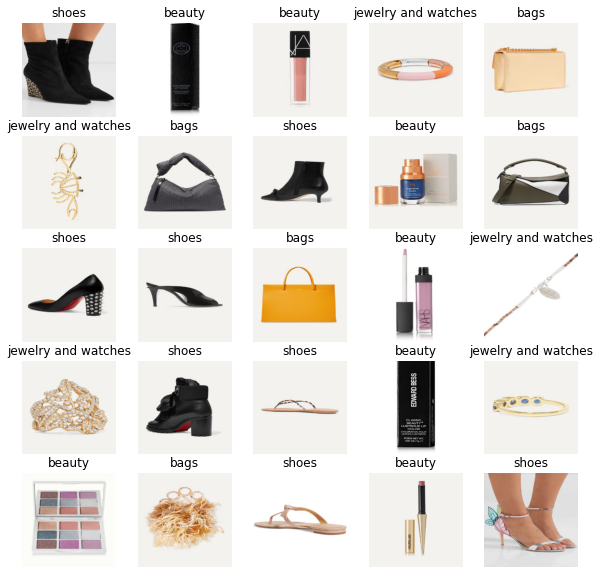

In [9]:
# Plot images wrt the given targets
plt.figure(figsize=(10, 10))

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img = mpimg.imread(path + '/fashion/' + df["images"][i])
    img = cv2.resize(img, (256, 256))
    plt.imshow(img)
    plt.title(df["target"][i])
    plt.axis("off")
    
    X = np.array(df)

In [10]:
# Check names of the columns
train_df.columns

Index(['files', 'target', 'images'], dtype='object')

In [11]:
# Check names of the new dataframe columns
df.columns

Index(['target', 'images', 'target_bags', 'target_beauty',
       'target_jewelry and watches', 'target_shoes'],
      dtype='object')

In [12]:
# Check unique columns
df['target'].unique()

array(['shoes', 'beauty', 'jewelry and watches', 'bags'], dtype=object)

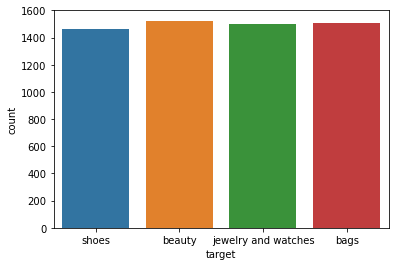

In [13]:
# Countplot to check if data has equal shape
sns.countplot(df['target'])

In [14]:
# Count to check if data has equal sape
df["target"].value_counts()

beauty                 1524
bags                   1508
jewelry and watches    1503
shoes                  1465
Name: target, dtype: int64

## __Preprocessing of the data:__

In [15]:
# Preprocessing the data
train_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img(path + '/fashion/' +df['images'][i],target_size=(256,256,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:18<00:00, 328.84it/s]


In [16]:
# Shape of the array
X.shape

(6000, 256, 256, 3)

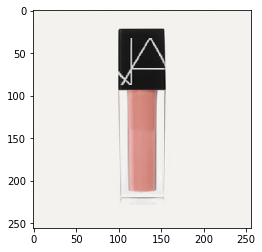

In [17]:
# Plot and visualize preprocessed image
plt.imshow(X[2])

In [18]:
# Plot and visualize preprocessed image
df['target'][2]

'beauty'

In [19]:
y = np.array(df.drop(['target', 'images'],axis=1))
y.shape

(6000, 4)

## __Defining the architecture of the model:__

In [20]:
# Randomly separate 10% of the images as our validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [21]:
# Define the architecture of our model
# 
model = Sequential()
# Layer1
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer2
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer3
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Layer4
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Defining output layer with Neurons
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

In [22]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 252, 252, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 32)      12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 57, 57, 64)        5

In [23]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Training the model.
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), batch_size=64)

Epoch 1/20
85/85 [==============================] - 395s 5s/step - loss: 0.6408 - accuracy: 0.2608 - val_loss: 0.6052 - val_accuracy: 0.3083
Epoch 2/20
85/85 [==============================] - 502s 6s/step - loss: 0.5709 - accuracy: 0.2950 - val_loss: 0.5152 - val_accuracy: 0.5283
Epoch 3/20
85/85 [==============================] - 535s 6s/step - loss: 0.5069 - accuracy: 0.5059 - val_loss: 0.4975 - val_accuracy: 0.4350
Epoch 4/20
85/85 [==============================] - 541s 6s/step - loss: 0.4415 - accuracy: 0.5935 - val_loss: 0.3929 - val_accuracy: 0.6850
Epoch 5/20
85/85 [==============================] - 540s 6s/step - loss: 0.4049 - accuracy: 0.6481 - val_loss: 0.3143 - val_accuracy: 0.7483
Epoch 6/20
85/85 [==============================] - 530s 6s/step - loss: 0.3444 - accuracy: 0.7156 - val_loss: 0.3007 - val_accuracy: 0.7400
Epoch 7/20
85/85 [==============================] - 523s 6s/step - loss: 0.3216 - accuracy: 0.7241 - val_loss: 0.2445 - val_accuracy: 0.8050
Epoch 8/20
85

In [75]:
# Took ~3 hours for training
# serialize model to JSON
model_json = model.to_json()
with open("weights_resized256.json", "w") as json_file:
    json_file.write(model_json)

# Save weights to HDF5
model.save("model_resized256.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load model
#model = load_model('model.h5')
#print("Loaded model from disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

#f = open ('model.json', "r")
#data = json.loads(f.read())
#data

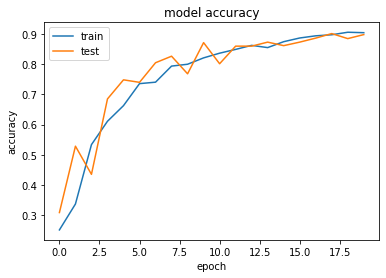

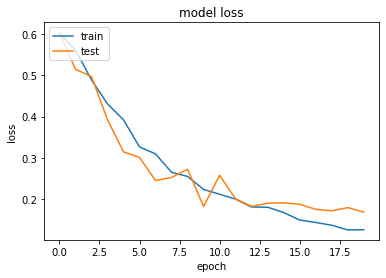

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [27]:
# evaluate the test set
scores = model.evaluate(X_test, y_test, verbose=0)
print("Final test %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# evaluate the train set
scores = model.evaluate(X_train, y_train, verbose=0)
print("Final train %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Final test accuracy: 89.83%
Final train accuracy: 95.11%


## __Testing the made arcitecture:__

In [57]:
img = image.load_img(path + '/predictImages/' +'prod9.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255

target_bags (0.98)
target_jewelry and watches (0.0145)
target_beauty (0.000858)
target_shoes (0.0002)


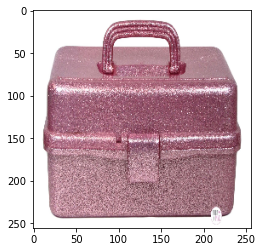

In [58]:
classes = np.array(df.columns[2:])
proba = model.predict(img.reshape(1,256,256,3))
among4 = np.argsort(proba[0])[:-5:-1]
for i in range(4):
    print("{}".format(classes[among4[i]])+" ({:.3})".format(proba[0][among4[i]]))
plt.imshow(img)

In [ ]:
def plotFilters(conv_filter):
    fig, axes = plt.subplots(1, 3, figsize=(5,5))
    axes = axes.flatten()
    for img, ax in zip( conv_filter, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

conv2d (5, 5, 3, 16)
16


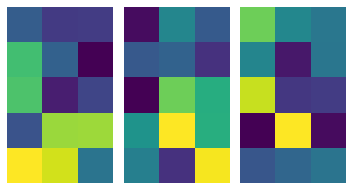

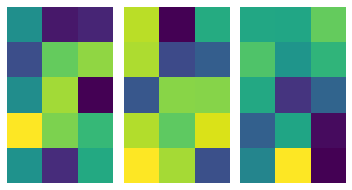

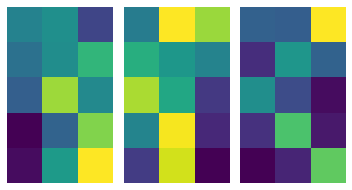

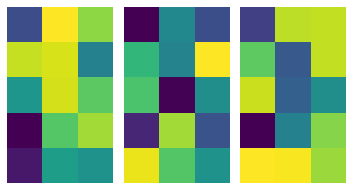

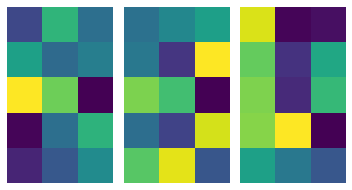

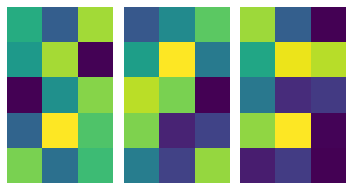

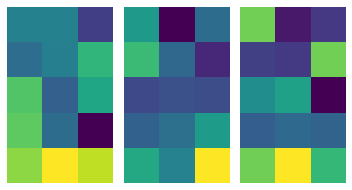

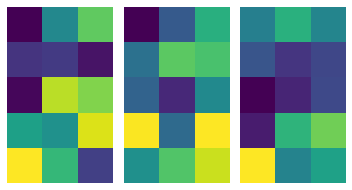

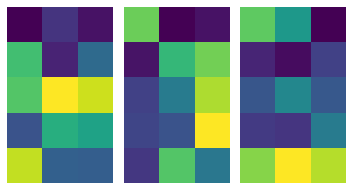

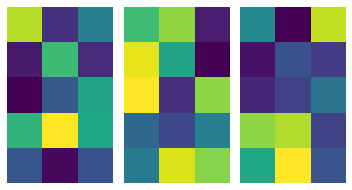

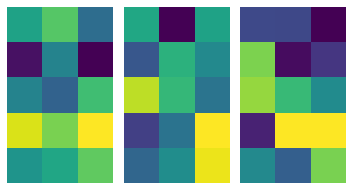

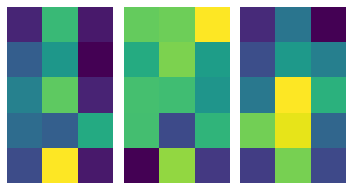

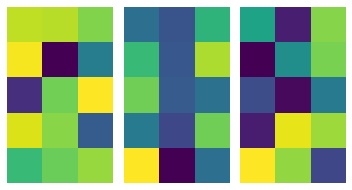

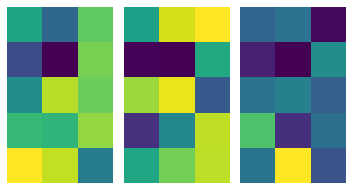

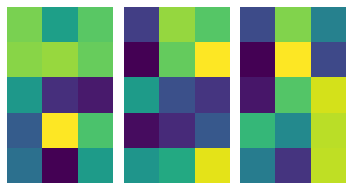

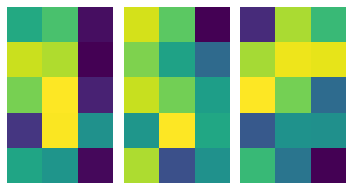

conv2d_1 (5, 5, 16, 32)
32


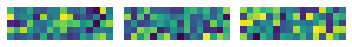

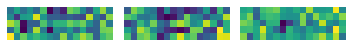

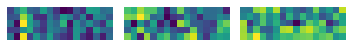

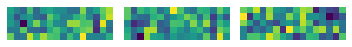

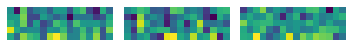

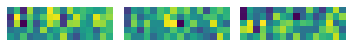

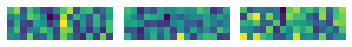

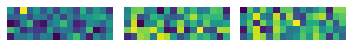

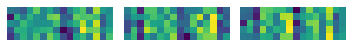

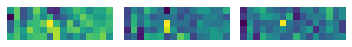

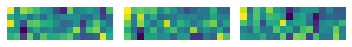

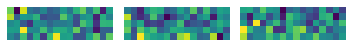

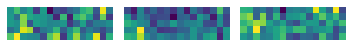

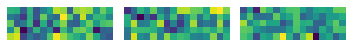

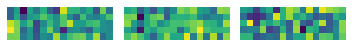

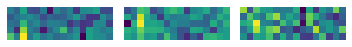

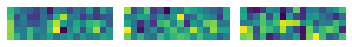

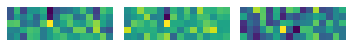

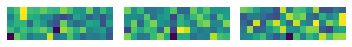

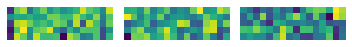

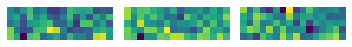

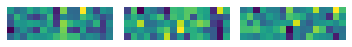

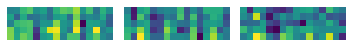

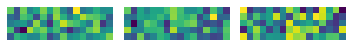

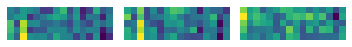

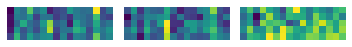

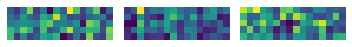

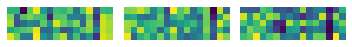

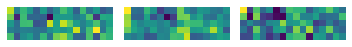

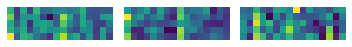

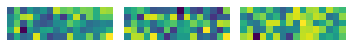

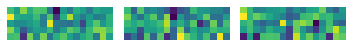

conv2d_2 (5, 5, 32, 64)
64


conv2d_3 (5, 5, 64, 64)
64


In [63]:
for layer in model.layers:
    if 'conv' in layer.name:
        filters, bias= layer.get_weights()
        print(layer.name, filters.shape)
         #normalize filter values between  0 and 1 for visualization
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)  
        print(filters.shape[3])
        axis_x=1
        #plotting all the filters
        for i in range(filters.shape[3]):
        #for i in range(6):
            #get the filters
            filt=filters[:,:,:, i]
            plotFilters(filt)

In [68]:
import tensorflow as tf
from keras.preprocessing import image


(1, 126, 126, 16)
(1, 126, 126, 16)
(1, 122, 122, 32)
(1, 61, 61, 32)
(1, 61, 61, 32)
(1, 57, 57, 64)
(1, 28, 28, 64)
(1, 28, 28, 64)
(1, 24, 24, 64)


<ipython-input-73-74c4629ae403>:53: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


(1, 12, 12, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 128)
(1, 128)
(1, 64)
(1, 64)
(1, 4)


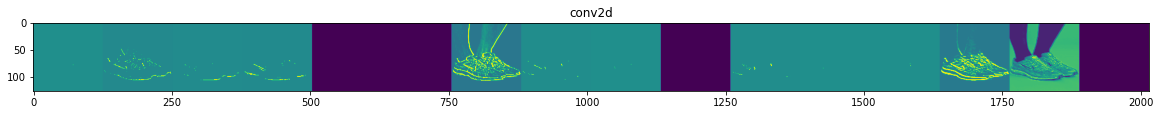

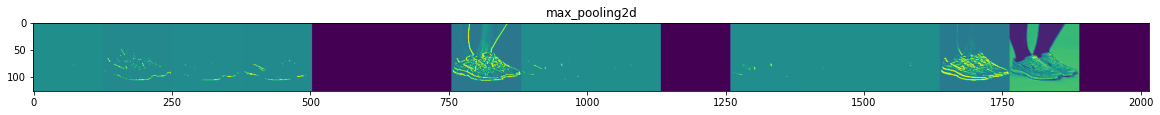

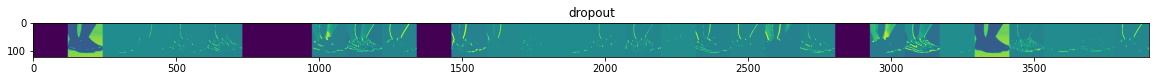

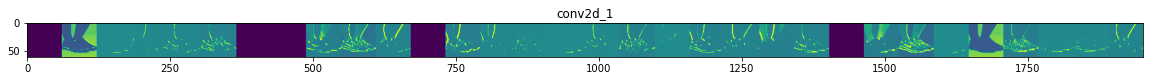

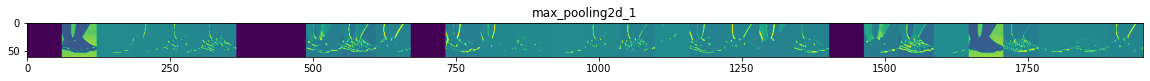

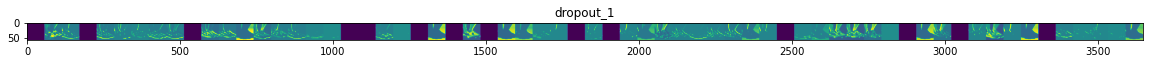

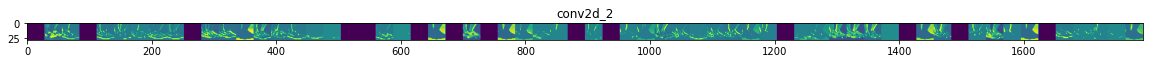

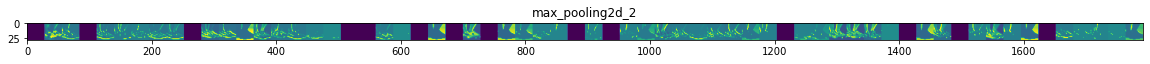

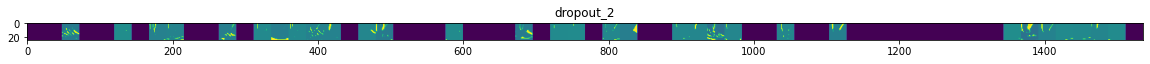

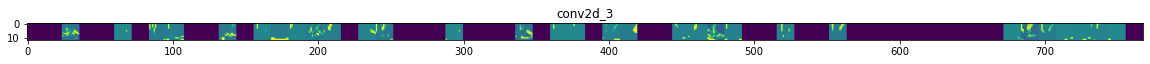

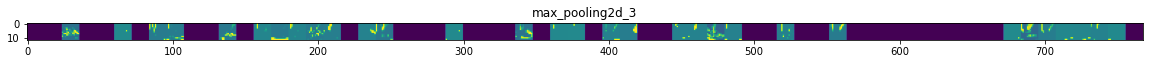

In [73]:

img_path='D:\\IIM Course\\Capstone Project\\Project\\fashion\\5da81a2d7d3a9baa211f7d93_1.jpg' #shoe
# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)


img = image.load_img(img_path, target_size=(256, 256))  # this is a PIL image

x   = image.img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]


# Now let's display our representations

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )